On essaye ici de creer un réseau de neuronnes CNN qui lui choisit ses propres Kernels et les rend invariant par rot

In [10]:
import torch
import torch.nn.functional as F
import torch.nn.utils.parametrize as parametrize
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

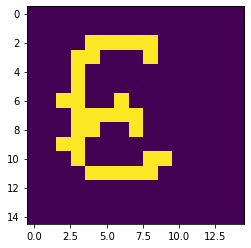

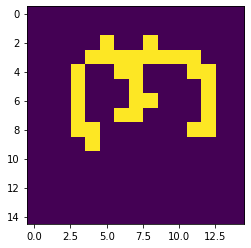

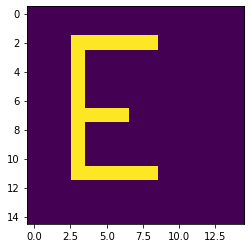

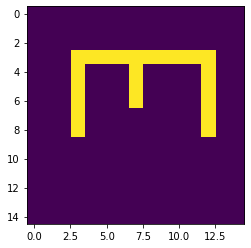

In [11]:
A=np.zeros((15,15))
#print(A)

data=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])



plt.imshow(data)
plt.show()

data2 = torch.from_numpy(data)
data2 = torch.rot90(data2, 1, [1,0])
data2 = data2.numpy()


plt.imshow(data2)
plt.show()

###################################################################

sortie=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


plt.imshow(sortie)
plt.show()

sortie2 = torch.from_numpy(sortie)
sortie2 = torch.rot90(sortie2, 1, [1,0])
sortie2 = sortie2.numpy()


plt.imshow(sortie2)
plt.show()


#X_train = [torch.from_numpy(data),torch.from_numpy(data2)]
#Y_train = [torch.from_numpy(sortie),torch.from_numpy(sortie2)]




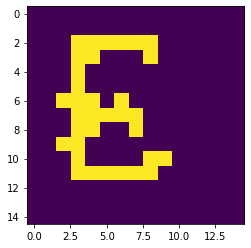

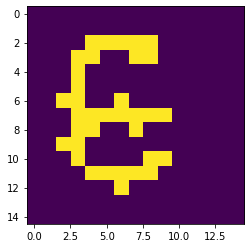

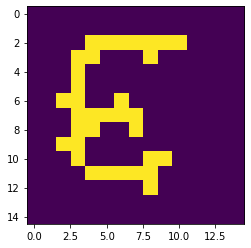

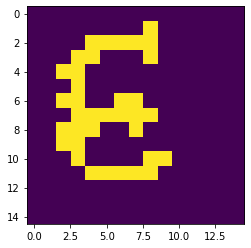

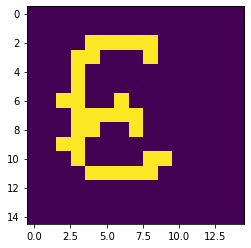

In [12]:
data1=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


plt.imshow(data1)
plt.show()

data2=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

plt.imshow(data2)
plt.show()


data3=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


plt.imshow(data3)
plt.show()

data4=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


plt.imshow(data4)
plt.show()

data5=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


plt.imshow(data5)
plt.show()


In [33]:
X_train = [torch.from_numpy(data1).view(1,1,15,15),torch.from_numpy(data2).view(1,1,15,15),torch.from_numpy(data3).view(1,1,15,15),torch.from_numpy(data4).view(1,1,15,15),torch.from_numpy(data5).view(1,1,15,15)]
#X_train = [torch.from_numpy(data1),torch.from_numpy(data2),torch.from_numpy(data3),torch.from_numpy(data4),torch.from_numpy(data5)]
#Y_train = [torch.from_numpy(sortie).view(1,1,15,15),torch.from_numpy(sortie).view(1,1,15,15),torch.from_numpy(sortie).view(1,1,15,15),torch.from_numpy(sortie).view(1,1,15,15),torch.from_numpy(sortie).view(1,1,15,15)]
Y_train = [torch.from_numpy(sortie),torch.from_numpy(sortie),torch.from_numpy(sortie),torch.from_numpy(sortie),torch.from_numpy(sortie)]
trainloader=[X_train,Y_train]
print(X_train, Y_train)

[tensor([[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]], dtype=torch.int32), tensor([[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       

In [35]:
trainloader=torch.utils.data.DataLoader(X_train, batch_size=batch_size, shuffle=True, num_workers=2)

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
print(len(trainset))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
50000
Files already downloaded and verified


In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [17]:
print(images[0])

tensor([[[-0.1686, -0.1765, -0.1765,  ...,  0.3647,  0.3333,  0.3255],
         [-0.1373, -0.1608, -0.1451,  ...,  0.0353,  0.0902,  0.1294],
         [-0.1686, -0.1765, -0.1529,  ..., -0.0353, -0.0118, -0.0196],
         ...,
         [-0.1922, -0.2000, -0.2627,  ..., -0.6392, -0.5922, -0.5686],
         [-0.1922, -0.1373, -0.1843,  ..., -0.5608, -0.6157, -0.5373],
         [-0.1608, -0.1216, -0.2314,  ..., -0.6471, -0.4745, -0.5137]],

        [[ 0.4824,  0.4510,  0.4353,  ...,  0.4902,  0.4118,  0.3725],
         [ 0.5137,  0.4667,  0.4745,  ...,  0.2235,  0.2000,  0.0510],
         [ 0.4510,  0.4588,  0.4667,  ...,  0.1922,  0.2078, -0.1373],
         ...,
         [-0.1059, -0.1686, -0.2471,  ..., -0.5686, -0.5216, -0.5294],
         [-0.0431,  0.0667, -0.0039,  ..., -0.4039, -0.5294, -0.4667],
         [-0.0588,  0.0745, -0.0510,  ..., -0.4118, -0.2627, -0.3804]],

        [[ 0.3961,  0.3882,  0.3725,  ...,  0.4667,  0.3333,  0.2000],
         [ 0.4510,  0.4275,  0.4353,  ...,  0

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 1, 3)
        
        

    def forward(self, x):
        x = self.conv1(x)
        x = torch.flatten(x, 1)
        
        return x

net = Net()





In [47]:
conv1 = nn.Conv2d(1, 1, 3,1,1)
conv1(torch.from_numpy(data1).view(1,1,15,15).float())

conv2 = nn.Conv2d(1, 1, 3,1,1)
conv1(torch.from_numpy(data1).view(1,1,15,15).float())

tensor([[[[ 0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.2663, -0.0174,  0.1953,  0.1953,  0.1953,
            0.1953,  0.1024,  0.3860,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.0782, -0.2140, -0.0774,  0.2062, -0.0064,
            0.0865, -0.1019,  0.4028,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.3011,  0.0423,  1.0560,  0.8519,  0.8351,
            0.6470,  0.6037,  0.5028,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.3011,  0.2304,  0.8416,  0.4860,  0.1734,
            0.3963,  0.2996,  0.4860,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.2663,  0.0175,  0.3129,  0.4317,  0.4789, -0.1102,
            0.3860,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,
       

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [50]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data
    #for i in range(5):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = [X_train[i],Y_train[i]]

        # zero the parameter gradients
        optimizer.zero_grad()
        if i==0:
            print(inputs)
            print(labels)
        
        # forward + backward + optimize
        outputs = conv1(torch.from_numpy(data1).view(1,1,15,15).float())
        loss = nn.MSELoss()
        output = loss(outputs, Y_train[i].float())
        output.backward()
        optimizer.step()

        

print('Finished Training')

tensor([[[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]],



        [[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        

C:\Users\ladis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([15, 15])) that is different to the input size (torch.Size([1, 1, 15, 15])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Finished Training


In [54]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

tensor([[[[ 0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.2663, -0.0174,  0.1953,  0.1953,  0.1953,
            0.1953,  0.1024,  0.3860,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.0782, -0.2140, -0.0774,  0.2062, -0.0064,
            0.0865, -0.1019,  0.4028,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.3011,  0.0423,  1.0560,  0.8519,  0.8351,
            0.6470,  0.6037,  0.5028,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.1734,  0.3011,  0.2304,  0.8416,  0.4860,  0.1734,
            0.3963,  0.2996,  0.4860,  0.1734,  0.1734,  0.1734,  0.1734,
            0.1734],
          [ 0.1734,  0.2663,  0.0175,  0.3129,  0.4317,  0.4789, -0.1102,
            0.3860,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,  0.1734,
       

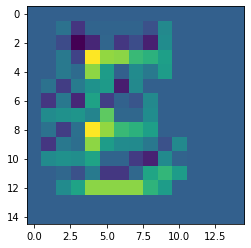

tensor([[[[ 0.3222,  0.3222,  0.3222,  0.3222,  0.3222,  0.3222,  0.3222,
            0.3222,  0.3222,  0.3222,  0.3222,  0.3222,  0.3222,  0.3222,
            0.3222],
          [ 0.3222,  0.3222,  0.3731,  0.0416, -0.2115, -0.2115, -0.2115,
           -0.2115, -0.2624,  0.0691,  0.3222,  0.3222,  0.3222,  0.3222,
            0.3222],
          [ 0.3222,  0.3222,  0.1866, -0.1725, -0.1941,  0.1374,  0.3905,
            0.4414,  0.2455,  0.3515,  0.3222,  0.3222,  0.3222,  0.3222,
            0.3222],
          [ 0.3222,  0.3222,  0.2476, -0.3538, -0.0373,  0.2434, -0.0390,
           -0.2255, -0.1276,  0.3738,  0.3222,  0.3222,  0.3222,  0.3222,
            0.3222],
          [ 0.3222,  0.3222,  0.2476, -0.1673, -0.0707,  0.0914,  0.3222,
            0.3831,  0.1308,  0.0914,  0.3222,  0.3222,  0.3222,  0.3222,
            0.3222],
          [ 0.3222,  0.3731, -0.0839, -0.4304, -0.2108,  0.1200, -0.0093,
            0.0691,  0.3222,  0.3222,  0.3222,  0.3222,  0.3222,  0.3222,
       

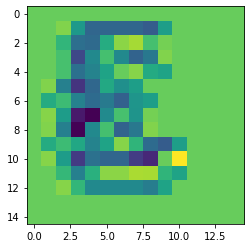

In [51]:
premierE=conv1(torch.from_numpy(data1).view(1,1,15,15).float())
print(premierE)

output= premierE.detach().numpy()[0][0]

print(output)
plt.imshow(output)
plt.show()

################

premier=conv2(torch.from_numpy(data1).view(1,1,15,15).float())
print(premier)

output1= premier.detach().numpy()[0][0]

print(output1)
plt.imshow(output1)
plt.show()

